<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_data(y_hat)_add_delta_(_3_2)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_-3.2'

In [4]:
os.listdir(base_path)

['data_add_delta_-3.2_n250.csv',
 'data_add_delta_-3.2_n120.csv',
 'data_add_delta_-3.2_n60.csv',
 'data_add_delta_-3.2_n30.csv',
 'data_add_delta_-3.2_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-3.2_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,95.295314,99.731283,31.945472,63.326487,0.000126,300.298680,300.298501,0.000179
1,0.0,1.0,62.341958,92.738979,37.239107,51.994211,-0.001094,254.313162,254.314593,-0.001432
2,0.0,2.0,82.767350,34.887227,94.604833,99.787529,-0.005563,322.041376,322.044168,-0.002791
3,0.0,3.0,49.539820,49.999782,53.122462,85.876007,0.001237,248.539309,248.536596,0.002713
4,0.0,4.0,98.457591,44.031028,65.231268,30.136533,-0.001278,247.855142,247.855081,0.000061
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,71.596603,29.318595,48.777026,28.089562,-0.005505,187.776281,187.777231,-0.000950
19996,999.0,16.0,30.657670,99.609873,54.056862,74.746229,-0.000441,269.070192,269.072228,-0.002036
19997,999.0,17.0,57.560842,69.461073,38.185239,58.082366,-0.000634,233.288886,233.288310,0.000576
19998,999.0,18.0,21.256972,23.348378,23.803154,82.160932,-0.007896,160.561539,160.568463,-0.006924


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,95.295314,99.731283,31.945472,63.326487,0.000126,300.298680,300.298501,0.000179
1,0.0,1.0,62.341958,92.738979,37.239107,51.994211,-0.001094,254.313162,254.314593,-0.001432
2,0.0,2.0,82.767350,34.887227,94.604833,99.787529,-0.005563,322.041376,322.044168,-0.002791
3,0.0,3.0,49.539820,49.999782,53.122462,85.876007,0.001237,248.539309,248.536596,0.002713
4,0.0,4.0,98.457591,44.031028,65.231268,30.136533,-0.001278,247.855142,247.855081,0.000061
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,71.596603,29.318595,48.777026,28.089562,-0.005505,187.776281,187.777231,-0.000950
19996,999.0,16.0,30.657670,99.609873,54.056862,74.746229,-0.000441,269.070192,269.072228,-0.002036
19997,999.0,17.0,57.560842,69.461073,38.185239,58.082366,-0.000634,233.288886,233.288310,0.000576
19998,999.0,18.0,21.256972,23.348378,23.803154,82.160932,-0.007896,160.561539,160.568463,-0.006924


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    95.295314  99.731283  31.945472  63.326487  0.000126  300.298680   
      1.0    62.341958  92.738979  37.239107  51.994211 -0.001094  254.313162   
      2.0    82.767350  34.887227  94.604833  99.787529 -0.005563  322.041376   
      3.0    49.539820  49.999782  53.122462  85.876007  0.001237  248.539309   
      4.0    98.457591  44.031028  65.231268  30.136533 -0.001278  247.855142   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   71.596603  29.318595  48.777026  28.089562 -0.005505  187.776281   
      16.0   30.657670  99.609873  54.056862  74.746229 -0.000441  269.070192   
      17.0   57.560842  69.461073  38.185239  58.082366 -0.000634  233.288886   
      18.0   21.256972  23.348378  23.803154  82.160932 -0.007896  160.561539   
      19.0   42.077897  86.238056  76.790919  20.572005  0.000061  235.678938   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    300.298501  0.000179  
      1.0    254.314593 -0.001432  
      2.0    322.044168 -0.002791  
      3.0    248.536596  0.002713  
      4.0    247.855081  0.000061  
...                 ...       ...  
999.0 15.0   187.777231 -0.000950  
      16.0   269.072228 -0.002036  
      17.0   233.288310  0.000576  
      18.0   160.568463 -0.006924  
      19.0   235.676666  0.002272  

[20000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    95.295314  99.731283  31.945472  63.326487  0.000126  300.298680   
      1.0    62.341958  92.738979  37.239107  51.994211 -0.001094  254.313162   
      2.0    82.767350  34.887227  94.604833  99.787529 -0.005563  322.041376   
      3.0    49.539820  49.999782  53.122462  85.876007  0.001237  248.539309   
      4.0    98.457591  44.031028  65.231268  30.136533 -0.001278  247.855142   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   71.596603  29.318595  48.777026  28.089562 -0.005505  187.776281   
      16.0   30.657670  99.609873  54.056862  74.746229 -0.000441  269.070192   
      17.0   57.560842  69.461073  38.185239  58.082366 -0.000634  233.288886   
      18.0   21.256972  23.348378  23.803154  82.160932 -0.007896  160.561539   
      19.0   42.077897  86.238056  76.790919  20.572005  0.000061  235.678938   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    300.298501  0.000179  
      1.0    254.314593 -0.001432  
      2.0    322.044168 -0.002791  
      3.0    248.536596  0.002713  
      4.0    247.855081  0.000061  
...                 ...       ...  
999.0 15.0   187.777231 -0.000950  
      16.0   269.072228 -0.002036  
      17.0   233.288310  0.000576  
      18.0   160.568463 -0.006924  
      19.0   235.676666  0.002272  

[20000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,95.295314,99.731283,31.945472,63.326487,0.000126,300.298680,300.298501,0.000179
1,0.0,1.0,62.341958,92.738979,37.239107,51.994211,-0.001094,254.313162,254.314593,-0.001432
2,0.0,2.0,82.767350,34.887227,94.604833,99.787529,-0.005563,322.041376,322.044168,-0.002791
3,0.0,3.0,49.539820,49.999782,53.122462,85.876007,0.001237,248.539309,248.536596,0.002713
4,0.0,4.0,98.457591,44.031028,65.231268,30.136533,-0.001278,247.855142,247.855081,0.000061
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,71.596603,29.318595,48.777026,28.089562,-0.005505,187.776281,187.777231,-0.000950
19996,999.0,16.0,30.657670,99.609873,54.056862,74.746229,-0.000441,269.070192,269.072228,-0.002036
19997,999.0,17.0,57.560842,69.461073,38.185239,58.082366,-0.000634,233.288886,233.288310,0.000576
19998,999.0,18.0,21.256972,23.348378,23.803154,82.160932,-0.007896,160.561539,160.568463,-0.006924


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    95.295314  99.731283  31.945472  63.326487  0.000126  300.298680   
      1.0    62.341958  92.738979  37.239107  51.994211 -0.001094  254.313162   
      2.0    82.767350  34.887227  94.604833  99.787529 -0.005563  322.041376   
      3.0    49.539820  49.999782  53.122462  85.876007  0.001237  248.539309   
      4.0    98.457591  44.031028  65.231268  30.136533 -0.001278  247.855142   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   71.596603  29.318595  48.777026  28.089562 -0.005505  187.776281   
      16.0   30.657670  99.609873  54.056862  74.746229 -0.000441  269.070192   
      17.0   57.560842  69.461073  38.185239  58.082366 -0.000634  233.288886   
      18.0   21.256972  23.348378  23.803154  82.160932 -0.007896  160.561539   
      19.0   42.077897  86.238056  76.790919  20.572005  0.000061  235.678938   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    300.298501  0.000179  
      1.0    254.314593 -0.001432  
      2.0    322.044168 -0.002791  
      3.0    248.536596  0.002713  
      4.0    247.855081  0.000061  
...                 ...       ...  
999.0 15.0   187.777231 -0.000950  
      16.0   269.072228 -0.002036  
      17.0   233.288310  0.000576  
      18.0   160.568463 -0.006924  
      19.0   235.676666  0.002272  

[20000 rows x 8 columns]

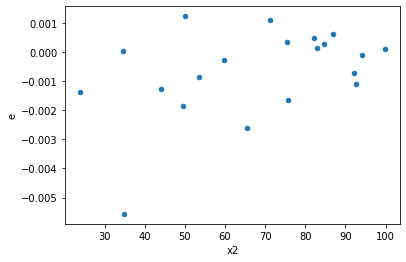

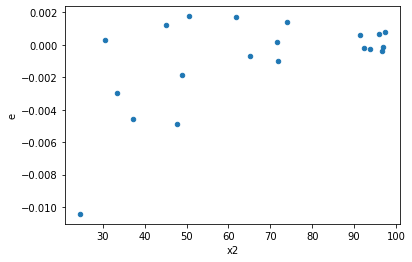

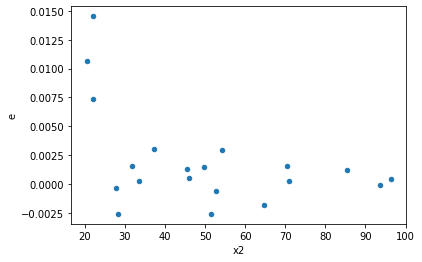

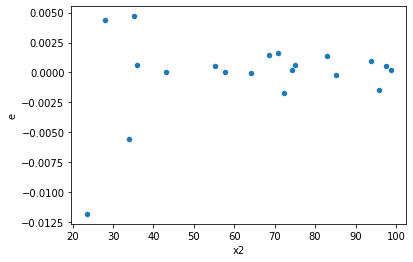

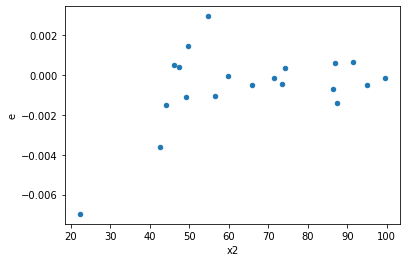

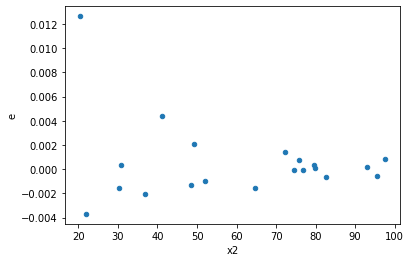

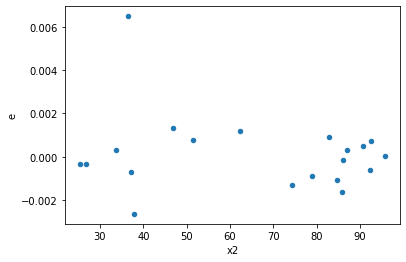

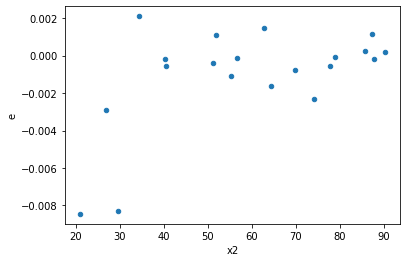

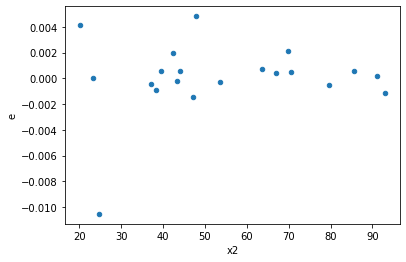

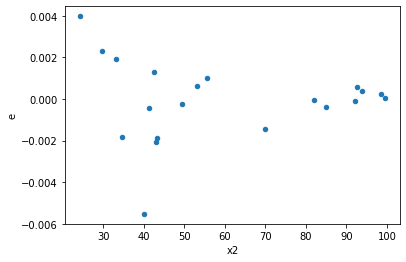

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,4.0,4.0,7.174759295338764e-06,9.212858529073363e-06,1.793689823834691e-06,2.303214632268341e-06,1.284065172062106,0.8144094660877705,0.5927952669561147,0.40720473304388527,Reject005=1 : Homoscedasticity
2.0,4.0,4.0,7.13765117760457e-06,9.475121083916704e-06,1.7844127944011426e-06,2.368780270979176e-06,1.3274844690710423,0.790338005688525,0.6048309971557375,0.3951690028442625,Reject005=1 : Homoscedasticity
10.0,4.0,4.0,8.931819217986499e-06,2.4621227533049145e-05,2.2329548044966247e-06,6.155306883262286e-06,2.7565747729721193,0.3497201862421653,0.8251399068789174,0.17486009312108264,Reject005=1 : Homoscedasticity
11.0,4.0,4.0,2.979819006539525e-06,1.6310136594863107e-05,7.449547516348813e-07,4.077534148715777e-06,5.47353264042843,0.12843075226780343,0.9357846238660983,0.06421537613390171,Reject005=1 : Homoscedasticity
14.0,4.0,4.0,9.744556571351515e-06,1.3708059087103857e-05,2.436139142837879e-06,3.427014771775964e-06,1.4067401617231954,0.7489127540104696,0.6255436229947652,0.3744563770052348,Reject005=1 : Homoscedasticity
22.0,4.0,4.0,8.712990195387496e-06,1.4447795767980782e-05,2.178247548846874e-06,3.6119489419951956e-06,1.6581902933425992,0.6361778001876766,0.6819110999061617,0.3180889000938383,Reject005=1 : Homoscedasticity
24.0,4.0,4.0,6.545375310029115e-06,2.233451120774733e-05,1.6363438275072787e-06,5.5836278019368326e-06,3.412258296865789,0.26163081313471825,0.8691845934326409,0.13081540656735913,Reject005=1 : Homoscedasticity
26.0,4.0,4.0,4.742279288052333e-06,3.031958761762136e-05,1.1855698220130832e-06,7.57989690440534e-06,6.393463095690785,0.09986557502473303,0.9500672124876335,0.04993278751236652,Reject005=1 : Homoscedasticity
32.0,4.0,4.0,1.7973115433930788e-05,2.022312977652267e-05,4.493278858482697e-06,5.055782444130668e-06,1.1251877756454045,0.9117421693506302,0.5441289153246849,0.4558710846753151,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,4.0,4.0,7.174759295338764e-06,9.212858529073363e-06,1.793689823834691e-06,2.303214632268341e-06,1.284065172062106,0.8144094660877705,Reject005=1 : Homoscedasticity
1.0,4.0,4.0,6.129101001034396e-05,1.848697837822926e-06,1.532275250258599e-05,4.621744594557315e-07,0.030162626419615618,0.005043324046284013,Reject005=0 : Heteroscedasticity
2.0,4.0,4.0,7.13765117760457e-06,9.475121083916704e-06,1.7844127944011426e-06,2.368780270979176e-06,1.3274844690710423,0.790338005688525,Reject005=1 : Homoscedasticity
3.0,4.0,4.0,2.1543562721583974e-05,4.327665627904027e-06,5.3858906803959934e-06,1.0819164069760068e-06,0.20087975623308785,0.14916712847889924,Reject005=1 : Homoscedasticity
4.0,4.0,4.0,1.0018817572909587e-05,1.4072936206779163e-06,2.5047043932273967e-06,3.5182340516947906e-07,0.14046504095285378,0.08354385813042334,Reject005=1 : Homoscedasticity
5.0,4.0,4.0,1.3159771145092788e-05,5.02201709284602e-07,3.289942786273197e-06,1.255504273211505e-07,0.038161887752270716,0.007908704750576959,Reject005=0 : Heteroscedasticity
6.0,4.0,4.0,2.05842666220013e-05,4.6385425855573734e-06,5.146066655500325e-06,1.1596356463893434e-06,0.22534407811252846,0.17804270253698784,Reject005=1 : Homoscedasticity
7.0,4.0,4.0,2.1624149463456495e-05,2.668118978446271e-06,5.406037365864124e-06,6.670297446115678e-07,0.1233860773555617,0.06708120715172738,Reject005=1 : Homoscedasticity
8.0,4.0,4.0,1.666107267962025e-05,2.6731041906532674e-06,4.165268169905062e-06,6.682760476633169e-07,0.16044010143014362,0.10412025668849721,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      659
Reject005=0 : Heteroscedasticity    341
Name: Result_test, dtype: int64